In [3]:
# Import basic lib
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [4]:
# load dataset
dataset=load_iris()

In [10]:
# Summarize Dataset
dataset.data
dataset.target
print(dataset.data.shape)
print(dataset.target.shape)

(150, 4)
(150,)


In [11]:
# Segregate Dataset into X(i/p / independent var / features) & Y ( o/p / dependent var / labels)
X= pd.DataFrame(dataset.data,columns=dataset.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
Y = dataset.target

In [13]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
# Splitting dataset into Train & Test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


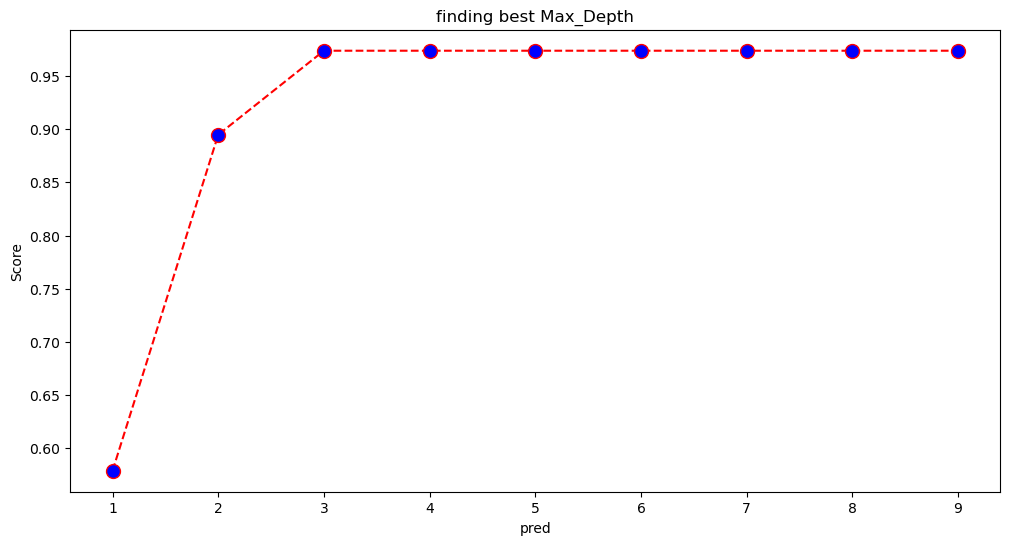

In [20]:
# Finding the best Max_Depth value
accuracy=[]
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for i in range(1,10):
    model=DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(Y_test,y_pred)
    accuracy.append(score)

plt.figure(figsize=(12,6))
plt.plot(range(1,10),accuracy,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("finding best Max_Depth")
plt.xlabel("pred")
plt.ylabel("Score")
plt.show()

In [21]:
# Training
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [24]:
# Prediction
y_pred=model.predict(X_test)
print(y_pred)
np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


array([[2, 2],
       [1, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 0],
       [2, 2],
       [2, 2],
       [1, 1],
       [0, 0],
       [2, 1]])

In [32]:
# Accuracy score
from sklearn.metrics import accuracy_score
print(f"Accuracy of the model : {(accuracy_score(Y_test,y_pred)*100)}")

Accuracy of the model : 97.36842105263158


In [33]:
input=[[5.1,3.5,1.4,0.2]]
y_pred=model.predict(input)
print(y_pred)

[0]


E:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [34]:
ip=[[5.9,3.0,5.1,1.8]]
y_pred=model.predict(ip)
print(y_pred)

[2]


E:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [35]:
# Use Case 2
import pandas as pd
movie_info=pd.read_csv('Movie Interests.csv')
movie_info

,Age,Gender,Interest
0,8,1,Animation
1,11,1,Animation
2,12,1,Animation
3,16,1,Action
4,18,1,Action
5,19,1,Action
6,23,1,Drama
7,26,1,Drama
8,27,1,Drama
9,7,0,Animation


In [36]:
input_dataset=movie_info.drop(columns=['Interest'])
input_dataset

,Age,Gender
0,8,1
1,11,1
2,12,1
3,16,1
4,18,1
5,19,1
6,23,1
7,26,1
8,27,1
9,7,0


In [37]:
output_dataset=movie_info['Interest']
output_dataset

0     Animation
1     Animation
2     Animation
3        Action
4        Action
5        Action
6         Drama
7         Drama
8         Drama
9     Animation
10    Animation
11    Animation
12       Action
13       Action
14       Action
15        Drama
16        Drama
17        Drama
Name: Interest, dtype: object

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(input_dataset,output_dataset,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)

(13, 2)
(5, 2)


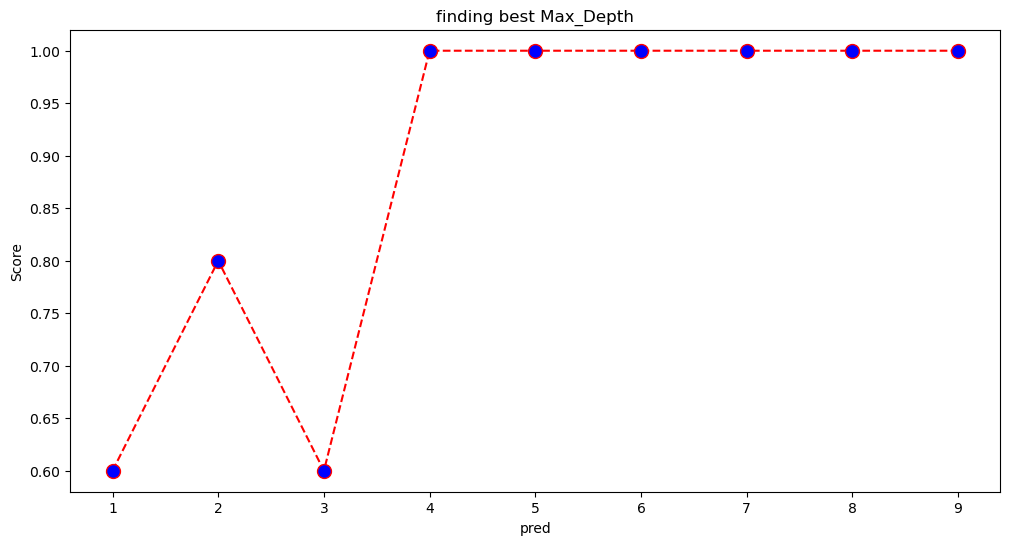

In [39]:
# Finding the best Max_Depth value
accuracy=[]
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for i in range(1,10):
    model=DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(input_dataset,output_dataset)
    y_pred=model.predict(X_test)
    score=accuracy_score(Y_test,y_pred)
    accuracy.append(score)

plt.figure(figsize=(12,6))
plt.plot(range(1,10),accuracy,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("finding best Max_Depth")
plt.xlabel("pred")
plt.ylabel("Score")
plt.show()

In [40]:
# Training
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [41]:
# Prediction
y_pred=model.predict(X_test)
print(y_pred)
np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1)

['Animation' 'Action' 'Action' 'Animation' 'Drama']


AttributeError: 'Series' object has no attribute 'reshape'

In [44]:
y_pred=model.predict([[21,1],[35,0]])
print(y_pred)

['Action' 'Drama']


E:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
